#### @author: Александр Владимирович Толмачев | axtolm@gmail.com
<hr>

## 4. Методы анализа данных на Python

## Часть 1. Корреляционный анализ

### На этом занятии мы планируем научиться:
- Вычислять парные корреляции, используя библиотеку pandas.
- Проверять значимость коэффициентов корреляций, используя библиотеку scipy.
- Визуализировать корреляционные матрицы c помощью библиотеки seaborn.
- Визуализировать данные с помощью диаграмм рассеяния и библиотеки seaborn.

### 1. Набор данных для анализа

**Для примера возьмем датасет с открытыми экономическими данными по Свердловской области за 2015-2018 годы, который включает:**<br>
- среднюю зарплату, 
- среднюю пенсию, 
- среднюю сумму заявки на потребительский кредит, 
- количество заявок на потребительские кредиты, 
- средние расходы по картам.

> Файл с данными в формате csv прилагается к материалами лекции.<br> 

Загрузим данные из csv файла в таблицу `pandas.DataFrame`<br>  

Воспользуемся методом `pandas.read_csv`<br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
<br>Далее ссылки на описание используемых методов будут приведены по ходу лекции.

Если файл находится в той же папке, что документ .ipynb, то путь к нему "С:/DIR/SUBDIR/.../filename.ext" можно не прописывать.<br>

In [1]:
import pandas as pd                            # импорт библиотеки
in_file_name = "dataset_1_correlations.csv"    # имя файла данных
df_in = pd.read_csv(in_file_name)              # загрузка данных в таблицу

Оценим полученные данные по первым строкам таблицы

In [2]:
df_in.head(3)    # выведем на экран первые три строки таблицы

,date,avg_salary,avg_pension,avg_sum_consumer_loan,n_consumer_loan,avg_card_spend
0,2015-01-15,19209,8831,192834,7173,7927
1,2015-02-15,25356,10451,201050,9291,7605
2,2015-03-15,24159,10284,200363,11937,8600


**Поля (столбцы) таблицы**<br>
- "date" - дата, для которой приведены экономические показатели, в формате str,
- "avg_salary" - средняя зарплата,
- "avg_pension" - средняя пенсия,
- "avg_sum_consumer_loan" - средняя сумма заявки на потребительский кредит,
- "n_consumer_loan" - количество заявок на потребительские кредиты,
- "avg_card_spend" - средние расходы по картам. 

### 2. Расчет парных корреляций

**Корреляция** - статистическая взаимосвязь двух случайных величин.<br>
Математической мерой корреляции служит **коэффициент корреляции**, который характеризует силу и характер взаимосвязи.<br>
Взаимосвязь может быть:
- **положительной** (когда одна переменная увеличивается, другая тоже увеличивается) - коэффициент близок к `+1`, 
- **отрицательной** (когда одна переменная увеличивается, другая уменьшается) - коэффициент близок к `-1`, 
- **отсутствовать** - коэффициент близок к `0`.<br>

Важно! Речь идет о статистической, а не причинно-следственной связи.<br>
Между числовыми величинами вычисляют коэффициент корреляции Пирсона.<br>
Для ранговых величин есть коэффициенты корреляции Спирмена и Кенделла.<br>
Формула для коэффициента корреляции Пирсона:<br>

$r_{xy} = \frac{\sum_{i=1}^{n} (x_i - x_{avg})(y_i - y_{avg})}{\sqrt{\sum_{i=1}^{n} (x_i - x_{avg})^2}\sqrt{\sum_{i=1}^{n} (y_i - y_{avg})^2}}$

где $n$ - количество элементов в выборке,<br>
$x_{avg} = \frac{\sum_{i=1}^{n} x_i}{n}$ - среднее значение $x$,<br>
$y_{avg} = \frac{\sum_{i=1}^{n} y_i}{n}$ - среднее значение $y$,<br>

**Условия применения**<br>
- Связь линейна и монотонна,
- Выбросы отсутствуют,
- Переменные нормально распределены.

В библиотеке pandas есть метод pandas.DataFrame.corr для вычисления парных корреляций между столбцами таблицы DataFrame.<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

Метод расчета коэффициента корреляции (Пирсон, Спирмен, Кенделл) задается в параметрах:<br>
```Python
- DataFrame.corr(method='pearson') 
- DataFrame.corr(method='spearman')
- DataFrame.corr(method='kendall')
```
По умолчанию подразумевается коэффициент Пирсона. Его можно не указывать и использовать DataFrame.corr()<br>
Величина p-value для оценки значимости при этом не вычисляется. Хотя статистическая гипотеза тут тоже есть: <br>
$H_0$ - коэффициент корреляции значимо не отличается от нуля.

In [3]:
df_corr = df_in.corr()   # вычислим коэффициент корреляции Пирсона и сохраним результат в DataFrame 
df_corr    # выведем получившуюся корреляционную матрицу на экран

,avg_salary,avg_pension,avg_sum_consumer_loan,n_consumer_loan,avg_card_spend
avg_salary,1.000000,0.663726,0.430948,0.393841,0.615139
avg_pension,0.663726,1.000000,0.612854,0.351566,0.747487
avg_sum_consumer_loan,0.430948,0.612854,1.000000,0.455063,0.849860
n_consumer_loan,0.393841,0.351566,0.455063,1.000000,0.573838
avg_card_spend,0.615139,0.747487,0.849860,0.573838,1.000000


Если хотим оценить значимость коэффициента корреляции Пирсона, то можем воспользоваться методом `pearsonr` из модуля `stats` библиотеки `scipy`, который вернет сам коэффициент и p-value:<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr<br>
Оценим значимость коэффициента корреляции Пирсона для пары `avg_salary` - `avg_pension`:

In [4]:
from scipy import stats
stats.pearsonr(df_in.avg_salary, df_in.avg_pension)

(0.6637260873725828, 2.012211294654844e-07)

Значение p-value = 2.0122112946548544e-07 позволяет опровергнуть гипотезу $H_0$ (коэффициент корреляции значимо не отличается от нуля).

### 3. Визуализация парных корреляций

#### 3.1. Отформатируем вывод на экран таблицы pandas DataFrame с коэффициентами корреляции

Если хотим отформатировать вывод корреляционной матрицы на экран (выделить ячейки цветом в зависимости от силы корреляционной связи и ограничить коэффициент корреляции 2 знаками после запятой), то можем сделать это так:

In [5]:
df_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,avg_salary,avg_pension,avg_sum_consumer_loan,n_consumer_loan,avg_card_spend
avg_salary,1.00,0.66,0.43,0.39,0.62
avg_pension,0.66,1.00,0.61,0.35,0.75
avg_sum_consumer_loan,0.43,0.61,1.00,0.46,0.85
n_consumer_loan,0.39,0.35,0.46,1.00,0.57
avg_card_spend,0.62,0.75,0.85,0.57,1.00


Для визуализации использовали возможности библиотеки pandas:
https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html
https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.set_precision.html

#### 3.2. Визуализируем матрицу с коэффициентами корреляции с помощью библиотеки seaborn

In [6]:
import matplotlib.pyplot as plt    # импорт библиотек
import seaborn as sns

Используем метод heatmap из seaborn:<br>
https://seaborn.pydata.org/generated/seaborn.heatmap.html

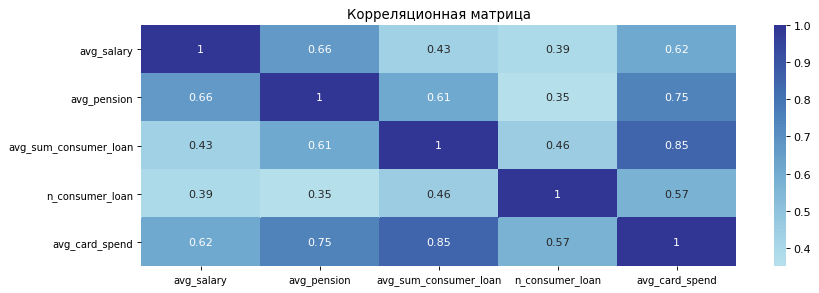

In [7]:
# отрисовка корреляционной матрицы
plt.figure(figsize=(12,4), dpi= 80)
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, cmap='RdYlBu', center=0, annot=True)
# оформление 
plt.title('Корреляционная матрица', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

#### 3.3. Визуализируем парные корреляции с помощью библиотеки seaborn и диаграмм рассеяния

In [8]:
import matplotlib.pyplot as plt    # импорт библиотек
import seaborn as sns

Используем метод `pairplot` из `seaborn`:<br>
https://seaborn.pydata.org/generated/seaborn.pairplot.html<br>
Обратите внимание, что метод работает с исходными данными, а не с корреляционной матрицей.

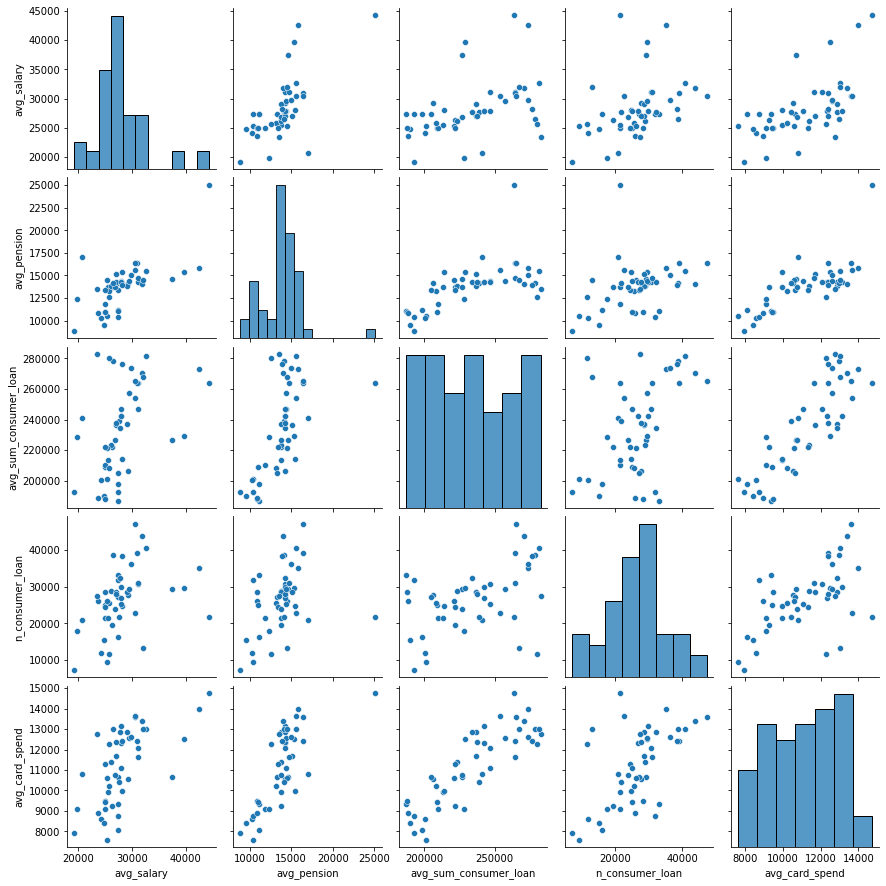

In [9]:
sns.pairplot(df_in)

#### Что видим на диаграмме?
__По диагонали__ - __гистограммы распределения__ для данных из каждой колонки рассматриваемого датасета.<br>

При необходимости мы можем построить гистограмму распределения отдельно:<br>
https://seaborn.pydata.org/generated/seaborn.histplot.html<br>
Например, для `avg_salary`

<AxesSubplot:xlabel='avg_salary', ylabel='Count'>

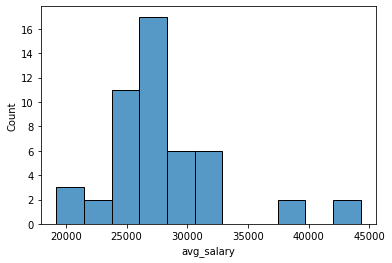

In [10]:
sns.histplot(df_in.avg_salary)

__В ячейках - парные диаграммы рассеяния__ для показателей, в пересечении которых находится ячейка.<br>

При необходимости мы можем построить диаграмму рассеяния отдельно для каждой пары:<br>
https://seaborn.pydata.org/generated/seaborn.histplot.html<br>
Например, для `avg_salary` и `avg_pension`

<AxesSubplot:xlabel='avg_salary', ylabel='avg_pension'>

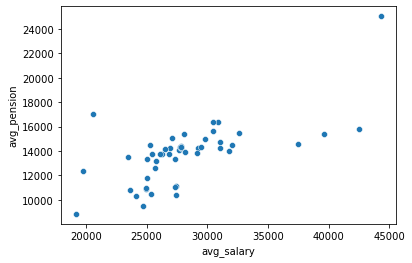

In [11]:
sns.scatterplot(data=df_in, x="avg_salary", y="avg_pension")

Что соответствует диаграмме во второй строке и первой колонке pairplot.<br>
При анализе диаграммы pairplot следует обращать внимание на то, какие переменные отображены по вертикальной и горизонтальной осям.

**Рассмотрим диаграммы рассеяния для пар с наибольшим и наименьшим коэффициентами корреляции**

Наибольший коэффициент корреляции у пары `средняя сумма заявки на потребительский кредит` - `средние расходы по картам`:<br>
`avg_sum_consumer_loan` - `avg_card_spend` = `0.85`

Наименьший коэффициент корреляции у пары `средняя пенсия` - `количество заявок на потребительские кредиты`:<br>
`avg_pension` - `n_consumer_loan` = `0.35`

Построим диаграммы рассеяния рядом для сравнения

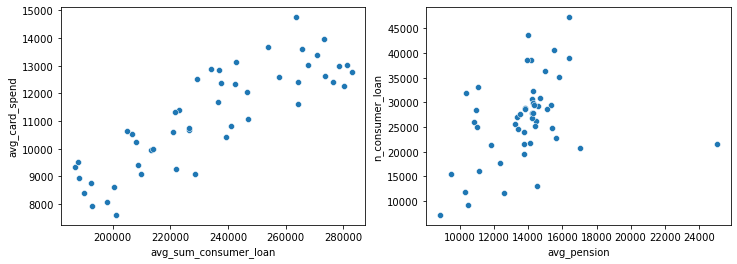

In [12]:
# Разметим 2 графика ax1 и ax2 рядом слева направо. Для этого сделаем subplots из 1 строки и 2 столбцов
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121) #1x2 left
ax2 = fig.add_subplot(122) #1x2 right
# Поместим в ax1 и ax2 наши диаграммы рассеяния
sns.scatterplot(data=df_in, x="avg_sum_consumer_loan", y="avg_card_spend", ax=ax1)
sns.scatterplot(data=df_in, x="avg_pension", y="n_consumer_loan", ax=ax2)
# выведем на экран
plt.show()

#### Что видим на диаграмме?
В случае с большей корреляцией точки лучше ложатся на прямую.<br>
В случае с меньшей корреляцией точки хуже ложатся на прямую и больше распределены на плоскости. Плюс наблюдается выброс.<br>
> Корреляционный анализ тесно связан с регрессионным анализом.

Оценим, насколько выброс на второй диаграмме влияет на величину коэффициента корреляции.<br>
Отфильтруем выброс по значению и вычислим коэффициент корреляции.

In [13]:
stats.pearsonr(df_in[df_in.avg_pension <22000].avg_pension, df_in[df_in.avg_pension <22000].n_consumer_loan)

(0.542191978049589, 6.876345778690527e-05)

После исключения одного выброса коэффициент корреляции увеличился $0.35 => 0.54$.<br>  

**Вывод - выбросы оказывают существенное влияние на коэффициент корреляции** и их нужно исключать из выборки при корреляционном анализе.

### Подведем итоги. На этом занятии мы научились:
- Вычислять парные корреляции, используя библиотеку pandas.
- Вычислять парные корреляции и проверять их значимость, используя библиотеку scipy.
- Визуализировать корреляционные матрицы c помощью библиотеки seaborn.
- Визуализировать данные для корреляционного анализа с помощью диаграмм рассеяния c помощью библиотеки seaborn.